In [ ]:
'''
Swarnim Varshneya
RA2011026030075
'''

In [1]:
#importing libraries
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt

In [2]:
#uploading dataframe
member_df = pd.read_csv("/Users/swarnim/Desktop/Assignment- Membership woes/Data-Table 1.csv")

In [3]:
#viewing data
member_df.head()

,MEMBERSHIP_NUMBER,MEMBERSHIP_TERM_YEARS,ANNUAL_FEES,MEMBER_MARITAL_STATUS,MEMBER_GENDER,MEMBER_ANNUAL_INCOME,MEMBER_OCCUPATION_CD,MEMBERSHIP_PACKAGE,MEMBER_AGE_AT_ISSUE,ADDITIONAL_MEMBERS,PAYMENT_MODE,AGENT_CODE,MEMBERSHIP_STATUS,START_DATE (YYYYMMDD),END_DATE (YYYYMMDD)
0,A00001,29,113125.0,M,M,25200000.0,1.0,TYPE-B,45,2,ANNUAL,477,INFORCE,20060914,NaN
1,A00002,38,112220.0,M,M,10339200.0,1.0,TYPE-B,36,3,QUARTERLY,255,INFORCE,20061102,NaN
2,A00003,12,100000.0,M,M,14400000.0,1.0,TYPE-B,42,1,ANNUAL,7866,INFORCE,20070124,NaN
3,A00004,12,100000.0,M,M,9000000.0,1.0,TYPE-B,39,2,ANNUAL,200533,INFORCE,20070122,NaN
4,A00005,46,100000.0,M,M,4800000.0,1.0,TYPE-B,27,2,QUARTERLY,6988,INFORCE,20070131,NaN


In [4]:
#getting basic information of the data
member_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10362 entries, 0 to 10361
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   MEMBERSHIP_NUMBER      10362 non-null  object 
 1   MEMBERSHIP_TERM_YEARS  10362 non-null  int64  
 2   ANNUAL_FEES            10362 non-null  float64
 3   MEMBER_MARITAL_STATUS  7765 non-null   object 
 4   MEMBER_GENDER          9751 non-null   object 
 5   MEMBER_ANNUAL_INCOME   8608 non-null   float64
 6   MEMBER_OCCUPATION_CD   10319 non-null  float64
 7   MEMBERSHIP_PACKAGE     10362 non-null  object 
 8   MEMBER_AGE_AT_ISSUE    10362 non-null  int64  
 9   ADDITIONAL_MEMBERS     10362 non-null  int64  
 10  PAYMENT_MODE           10362 non-null  object 
 11  AGENT_CODE             10362 non-null  object 
 12  MEMBERSHIP_STATUS      10362 non-null  object 
 13  START_DATE (YYYYMMDD)  10362 non-null  int64  
 14  END_DATE  (YYYYMMDD)   3143 non-null   float64
dtypes:

In [5]:
#checking null values
member_df.isnull().sum()

MEMBERSHIP_NUMBER           0
MEMBERSHIP_TERM_YEARS       0
ANNUAL_FEES                 0
MEMBER_MARITAL_STATUS    2597
MEMBER_GENDER             611
MEMBER_ANNUAL_INCOME     1754
MEMBER_OCCUPATION_CD       43
MEMBERSHIP_PACKAGE          0
MEMBER_AGE_AT_ISSUE         0
ADDITIONAL_MEMBERS          0
PAYMENT_MODE                0
AGENT_CODE                  0
MEMBERSHIP_STATUS           0
START_DATE (YYYYMMDD)       0
END_DATE  (YYYYMMDD)     7219
dtype: int64

In [6]:
#data pre-processing starts
columns_to_exclude = ['END_DATE  (YYYYMMDD)']

In [7]:
#removing null values
member_df_clean = member_df.dropna(subset=[col for col in member_df.columns if col not in columns_to_exclude])

In [8]:
#seeing shape of the data
member_df_clean.shape

(7275, 15)

In [9]:
#removing this as majorly the singles will not have additional members
member_df_clean = member_df_clean.drop(['ADDITIONAL_MEMBERS'], axis=1)

In [10]:

member_df_clean

,MEMBERSHIP_NUMBER,MEMBERSHIP_TERM_YEARS,ANNUAL_FEES,MEMBER_MARITAL_STATUS,MEMBER_GENDER,MEMBER_ANNUAL_INCOME,MEMBER_OCCUPATION_CD,MEMBERSHIP_PACKAGE,MEMBER_AGE_AT_ISSUE,PAYMENT_MODE,AGENT_CODE,MEMBERSHIP_STATUS,START_DATE (YYYYMMDD),END_DATE (YYYYMMDD)
0,A00001,29,113125.00,M,M,25200000.0,1.0,TYPE-B,45,ANNUAL,477,INFORCE,20060914,NaN
1,A00002,38,112220.00,M,M,10339200.0,1.0,TYPE-B,36,QUARTERLY,255,INFORCE,20061102,NaN
2,A00003,12,100000.00,M,M,14400000.0,1.0,TYPE-B,42,ANNUAL,7866,INFORCE,20070124,NaN
3,A00004,12,100000.00,M,M,9000000.0,1.0,TYPE-B,39,ANNUAL,200533,INFORCE,20070122,NaN
4,A00005,46,100000.00,M,M,4800000.0,1.0,TYPE-B,27,QUARTERLY,6988,INFORCE,20070131,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10352,A10357,32,297270.24,M,M,999996.0,1.0,TYPE-A,38,MONTHLY,1079488,INFORCE,20131129,NaN
10353,A10358,19,123706.92,S,F,1800000.0,1.0,TYPE-A,29,MONTHLY,20300,INFORCE,20131129,NaN
10354,A10359,17,141011.64,M,M,799992.0,2.0,TYPE-A,61,MONTHLY,343455,INFORCE,20131129,NaN
10356,A10361,17,113316.53,M,M,399996.0,1.0,TYPE-A,42,ANNUAL,348099,INFORCE,20131129,NaN


In [9]:
#this will not really impact the data
member_df_clean = member_df_clean.drop(['MEMBER_OCCUPATION_CD'], axis=1)


In [10]:
member_df_clean.head()

,MEMBERSHIP_NUMBER,MEMBERSHIP_TERM_YEARS,ANNUAL_FEES,MEMBER_MARITAL_STATUS,MEMBER_GENDER,MEMBER_ANNUAL_INCOME,MEMBERSHIP_PACKAGE,MEMBER_AGE_AT_ISSUE,ADDITIONAL_MEMBERS,PAYMENT_MODE,AGENT_CODE,MEMBERSHIP_STATUS,START_DATE (YYYYMMDD),END_DATE (YYYYMMDD)
0,A00001,29,113125.0,M,M,25200000.0,TYPE-B,45,2,ANNUAL,477,INFORCE,20060914,NaN
1,A00002,38,112220.0,M,M,10339200.0,TYPE-B,36,3,QUARTERLY,255,INFORCE,20061102,NaN
2,A00003,12,100000.0,M,M,14400000.0,TYPE-B,42,1,ANNUAL,7866,INFORCE,20070124,NaN
3,A00004,12,100000.0,M,M,9000000.0,TYPE-B,39,2,ANNUAL,200533,INFORCE,20070122,NaN
4,A00005,46,100000.0,M,M,4800000.0,TYPE-B,27,2,QUARTERLY,6988,INFORCE,20070131,NaN


In [11]:
#this is a very scattered data which will need alot of preprocessing and we have enough other features we can work with
member_df_clean = member_df_clean.drop(['AGENT_CODE'], axis=1)

In [12]:
#calculating average income
avg_income = member_df_clean['MEMBER_ANNUAL_INCOME'].mean()

In [13]:
avg_income

1114710.6474226804

In [14]:
#counting number of members by marital status
marital_status_counts = member_df_clean['MEMBER_MARITAL_STATUS'].value_counts()

In [15]:
marital_status_counts

MEMBER_MARITAL_STATUS
M    5996
S    1117
W     117
D      45
Name: count, dtype: int64

In [16]:
#importing for graphs
import seaborn as sns

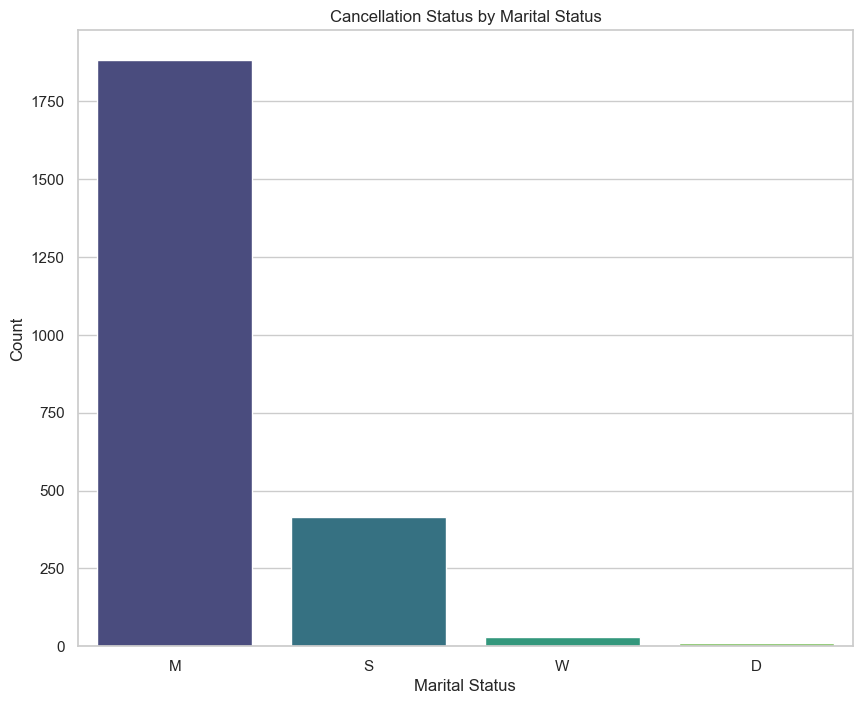

In [17]:
#plotting graph for marital status and cancellation
sns.set(style="whitegrid")
plt.figure(figsize=(10, 8))
cancelled_df = member_df_clean[member_df_clean['MEMBERSHIP_STATUS'] == 'CANCELLED']
sns.countplot(x='MEMBER_MARITAL_STATUS', data=cancelled_df, order=['M', 'S', 'W', 'D'], palette='viridis')
plt.title('Cancellation Status by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

In [18]:
#extracting cancelled and inforce
cancelled_df = member_df_clean[member_df_clean['MEMBERSHIP_STATUS'] == 'CANCELLED']
in_force_df = member_df_clean[member_df_clean['MEMBERSHIP_STATUS'] == 'INFORCE']

In [19]:
#averaging income on cancelled and inforce
avg_income_cancelled = cancelled_df['MEMBER_ANNUAL_INCOME'].mean()
avg_income_in_force = in_force_df['MEMBER_ANNUAL_INCOME'].mean()


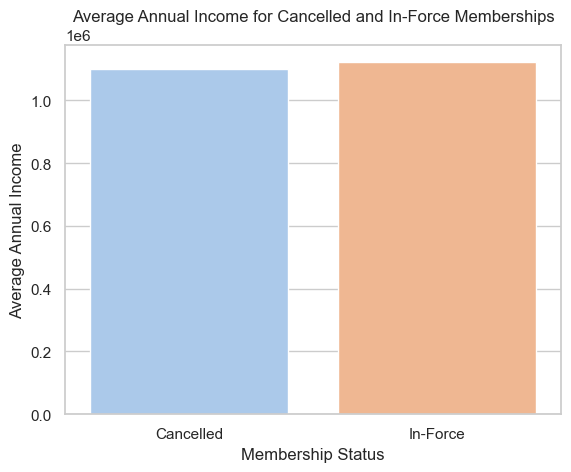

In [20]:
#plotting graph for income for cancelled and inforce
sns.barplot(x=['Cancelled', 'In-Force'], y=[avg_income_cancelled, avg_income_in_force], palette='pastel')
plt.title('Average Annual Income for Cancelled and In-Force Memberships')
plt.xlabel('Membership Status')
plt.ylabel('Average Annual Income')
plt.show()

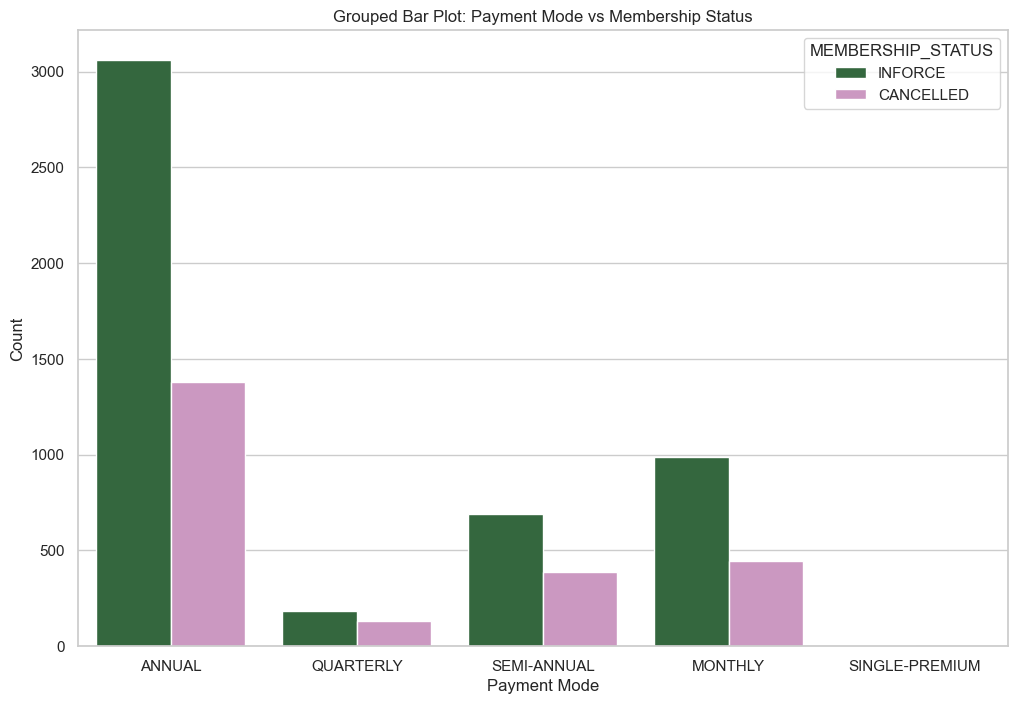

In [21]:
#plotting graph for payment mode and membership status
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.countplot(x='PAYMENT_MODE', hue='MEMBERSHIP_STATUS', data=member_df_clean, palette='cubehelix')
plt.title('Grouped Bar Plot: Payment Mode vs Membership Status')
plt.xlabel('Payment Mode')
plt.ylabel('Count')
plt.show()

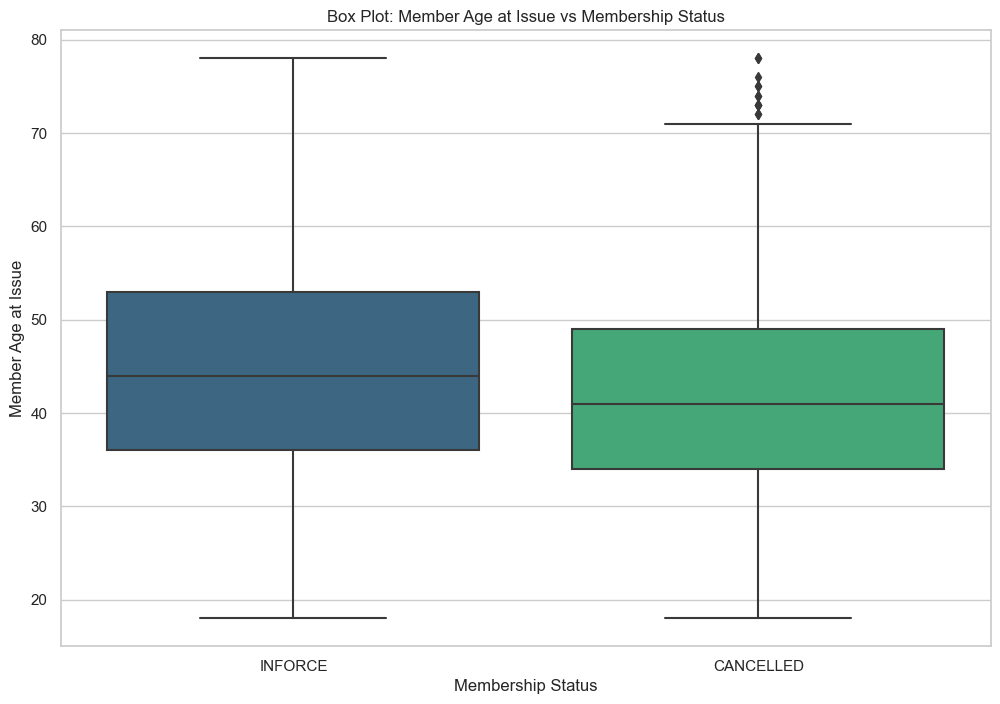

In [22]:
#plotting graph for member age at issue and membership status
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.boxplot(x='MEMBERSHIP_STATUS', y='MEMBER_AGE_AT_ISSUE', data=member_df_clean, palette='viridis')
plt.title('Box Plot: Member Age at Issue vs Membership Status')
plt.xlabel('Membership Status')
plt.ylabel('Member Age at Issue')
plt.show()

In [23]:
#taking ratio of income to fee to make income an useful attribute
member_df_clean['Income_to_Fee_Ratio'] = member_df_clean['MEMBER_ANNUAL_INCOME'] / member_df_clean['ANNUAL_FEES']

In [24]:
member_df_clean['Income_to_Fee_Ratio']

0        222.762431
1         92.133310
2        144.000000
3         90.000000
4         48.000000
            ...    
10352      3.363929
10353     14.550520
10354      5.673234
10356      3.529900
10361      2.999989
Name: Income_to_Fee_Ratio, Length: 7275, dtype: float64

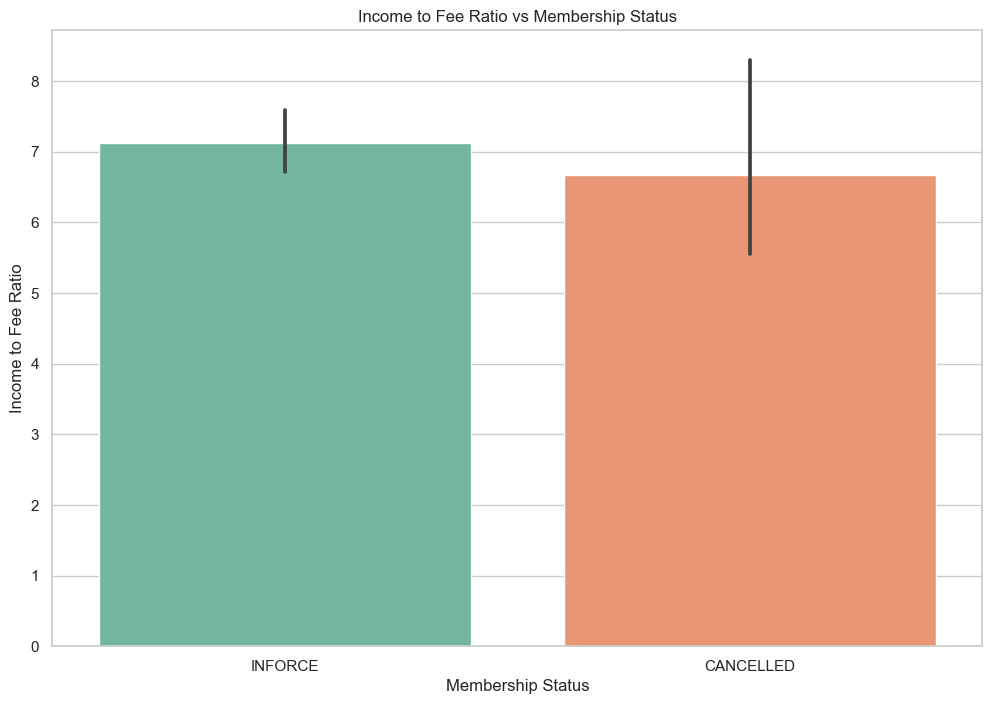

In [25]:
#plotting graph for income to fee ratio and membership status
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.barplot(x='MEMBERSHIP_STATUS', y='Income_to_Fee_Ratio', data=member_df_clean, palette='Set2')
plt.title('Income to Fee Ratio vs Membership Status')
plt.xlabel('Membership Status')
plt.ylabel('Income to Fee Ratio')
plt.show()

In [26]:
#checking for other features
avg_term_years = member_df_clean.groupby('MEMBERSHIP_STATUS')['MEMBERSHIP_TERM_YEARS'].mean().reset_index()


In [27]:
avg_term_years

,MEMBERSHIP_STATUS,MEMBERSHIP_TERM_YEARS
0,CANCELLED,25.361848
1,INFORCE,25.748228


In [28]:
member_df_clean

,MEMBERSHIP_NUMBER,MEMBERSHIP_TERM_YEARS,ANNUAL_FEES,MEMBER_MARITAL_STATUS,MEMBER_GENDER,MEMBER_ANNUAL_INCOME,MEMBERSHIP_PACKAGE,MEMBER_AGE_AT_ISSUE,ADDITIONAL_MEMBERS,PAYMENT_MODE,MEMBERSHIP_STATUS,START_DATE (YYYYMMDD),END_DATE (YYYYMMDD),Income_to_Fee_Ratio
0,A00001,29,113125.00,M,M,25200000.0,TYPE-B,45,2,ANNUAL,INFORCE,20060914,NaN,222.762431
1,A00002,38,112220.00,M,M,10339200.0,TYPE-B,36,3,QUARTERLY,INFORCE,20061102,NaN,92.133310
2,A00003,12,100000.00,M,M,14400000.0,TYPE-B,42,1,ANNUAL,INFORCE,20070124,NaN,144.000000
3,A00004,12,100000.00,M,M,9000000.0,TYPE-B,39,2,ANNUAL,INFORCE,20070122,NaN,90.000000
4,A00005,46,100000.00,M,M,4800000.0,TYPE-B,27,2,QUARTERLY,INFORCE,20070131,NaN,48.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10352,A10357,32,297270.24,M,M,999996.0,TYPE-A,38,2,MONTHLY,INFORCE,20131129,NaN,3.363929
10353,A10358,19,123706.92,S,F,1800000.0,TYPE-A,29,0,MONTHLY,INFORCE,20131129,NaN,14.550520
10354,A10359,17,141011.64,M,M,799992.0,TYPE-A,61,1,MONTHLY,INFORCE,20131129,NaN,5.673234
10356,A10361,17,113316.53,M,M,399996.0,TYPE-A,42,1,ANNUAL,INFORCE,20131129,NaN,3.529900


In [29]:
#seeing cancelled members by gender
cancelled_counts_by_gender = member_df_clean[member_df_clean['MEMBERSHIP_STATUS'] == 'CANCELLED']['MEMBER_GENDER'].value_counts()

In [30]:
cancelled_counts_by_gender

MEMBER_GENDER
M    1842
F     496
Name: count, dtype: int64

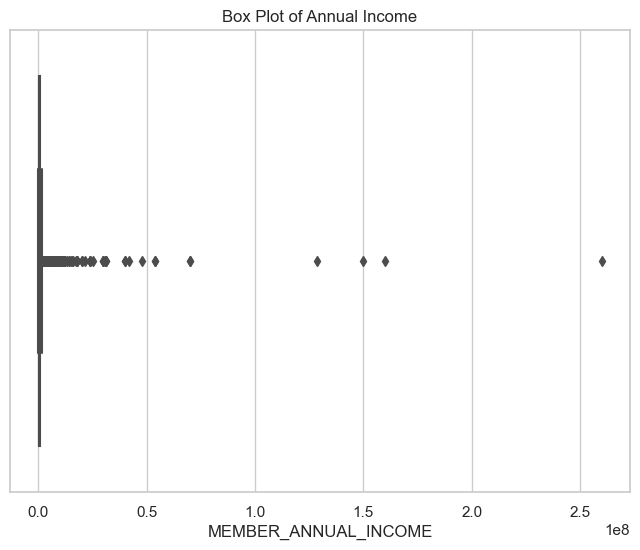

In [31]:
#checking overliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=member_df_clean['MEMBER_ANNUAL_INCOME'])
plt.title('Box Plot of Annual Income')
plt.show()

In [32]:
from scipy.stats import zscore

In [33]:
#calculating overliers
z_scores = zscore(member_df_clean['MEMBER_ANNUAL_INCOME'])
outliers = (abs(z_scores) > 1.8)

In [34]:
#as it is very less than our data, we will not remove these
outliers.sum()

62

In [35]:
member_df_clean.shape

(7275, 14)

In [43]:
#importing libraries for our model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  accuracy_score

In [49]:
#describing the features and target for decision trees
features = ['MEMBER_MARITAL_STATUS', 'PAYMENT_MODE', 'MEMBER_AGE_AT_ISSUE', 'Income_to_Fee_Ratio', 'MEMBER_GENDER', 'ANNUAL_FEES', 'MEMBERSHIP_PACKAGE']
target = 'MEMBERSHIP_STATUS'

In [50]:
#giving variables
X = member_df_clean[features]
y = member_df_clean[target]

In [51]:
#handling categorical data
X_encoded = pd.get_dummies(X, columns=['MEMBER_MARITAL_STATUS', 'PAYMENT_MODE', 'MEMBER_GENDER', 'MEMBERSHIP_PACKAGE'], drop_first=True)

In [52]:
#splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [53]:
#defining random forest classifier
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)

In [54]:
#fitting the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [55]:
#making predictions
y_pred = rf_model.predict(X_test)

In [56]:
#checking accuracy
accuracy_score(y_test, y_pred)

0.6611683848797251

In [49]:
#importing libraries for confusion matrix
from sklearn.metrics import confusion_matrix

In [50]:
#defining confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

In [51]:
conf_matrix

array([[163, 320],
       [173, 799]])

In [ ]:
'''
Accuracy: 66.12%
Sensitivity: 71.40%
Precision: 82.20%
F1 Score: 76.42%
'''

In [ ]:
'''
I have removed the columns for the dataframe to make it less confusing and have used simple graphs to explain how the features I have used are
more important.
I have also tagged every cell so that it is easily understandable for the reader.
At the end I have also calculated the different metrics that I have derived from the confusion matrix.
I have used the random forest classifier for this prediction tasks as we had many features to work with so any ensemble learning technique would
have been a perfect fit.
I will be also uploading the graphs I have used to explain the features on github.
'''